### MAT3110-MAT4110, Autumn 2024, Compulsory assignment 2
Elias Tidemand Ruud

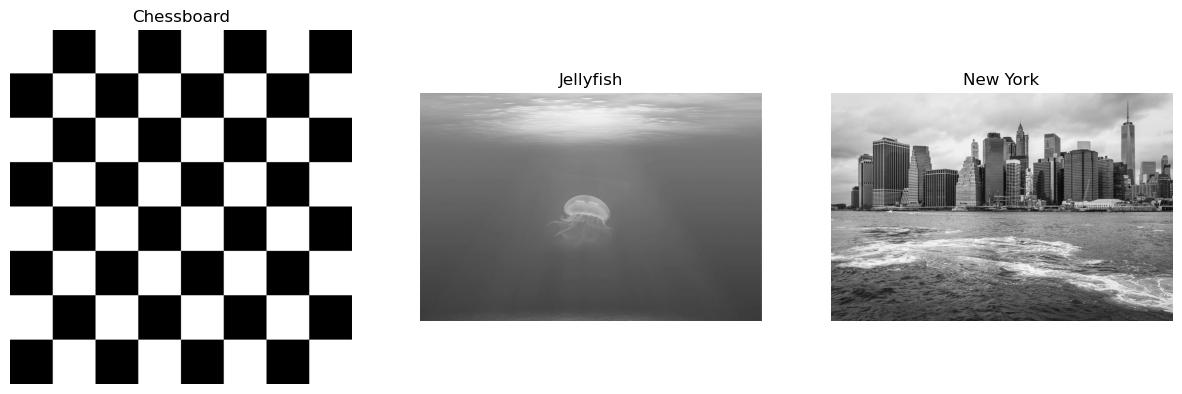

In [9]:

# Read in images

# Matlab code from task to python with gpt
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float
import os
import seaborn as sns

# Define the absolute path to the images
image_folder = './'  # Assuming images are in the same directory as the notebook
image_paths = {
    'chessboard': os.path.join(image_folder, 'chessboard.png'),
    'jellyfish': os.path.join(image_folder, 'jellyfish.jpg'),
    'new_york': os.path.join(image_folder, 'outdoors.jpg')
}

# Load and convert images to grayscale
im1 = color.rgb2gray(io.imread(image_paths['chessboard']))
im2 = color.rgb2gray(io.imread(image_paths['jellyfish']))
im3 = color.rgb2gray(io.imread(image_paths['new_york']))


# Convert images to double precision floats between 0 and 1
im1 = img_as_float(im1)
im2 = img_as_float(im2)
im3 = img_as_float(im3)

#sns.set_theme()

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(im1, cmap='gray', vmin=0, vmax=1)
axs[0].set_title('Chessboard')
axs[0].axis('off')

axs[1].imshow(im2, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Jellyfish')
axs[1].axis('off')

axs[2].imshow(im3, cmap='gray', vmin=0, vmax=1)
axs[2].set_title('New York')
axs[2].axis('off')
plt.show()


In [10]:

# Task: Compress image using SVD compisition. Remove the smallest singular values

def compress_image_SVD(img, r_rate_remove, printInfo = False, printLogSing = False):
    # Compress image given compression rate (0.1 meaning keep 10%) and return the compressed image
    U, S, VT = np.linalg.svd(img)
    r = int(S.size * r_rate_remove)
    U_ = U[:, :r] # r first columns corresponding to the singular values
    S_ = np.diag(S[:r]) # convert from vector to array
    VT_ = VT[:r, :] # first r rows.

    entries_orig  = (U.size + S.size + VT.size)
    entries_comp  = (U_.size + S_.size + VT_.size)
    rate = entries_comp/entries_orig
    
    if printInfo:
        print(f"Values stored rate: {rate*100:.2f} %")

    if printLogSing:
        logS = np.log(S)
        #print(logS)
        plt.plot(logS)
        plt.title("Logarithmic values for singular values decreasing")
        plt.ylabel("Log of singular values")
        plt.xlabel("Singular values")
        plt.show()

    compressed_img = U_@S_@VT_ # multiply arrays back together
    
    return compressed_img, rate


Image1 - chessboard: See that need just 30 singular values is sufficient. About 2.5 percent of singular values. Very simple image to represent
Values stored rate: 2.41 %


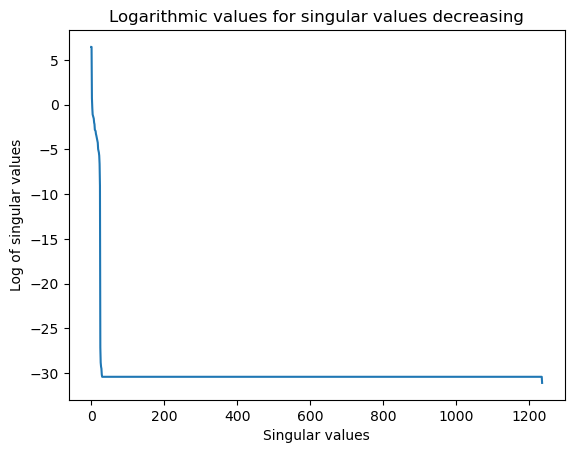

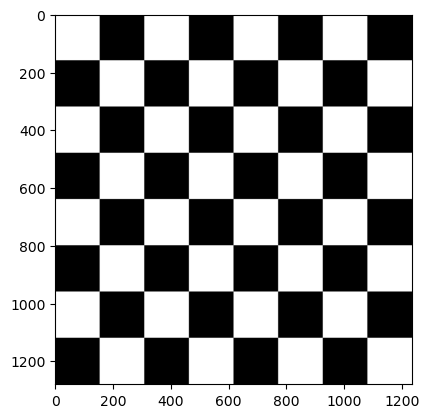

Image2 - jellyfish: 10 percent seemed sufficient
Values stored rate: 7.96 %


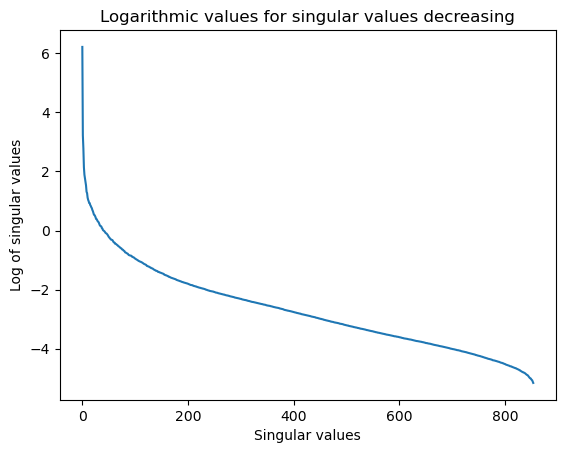

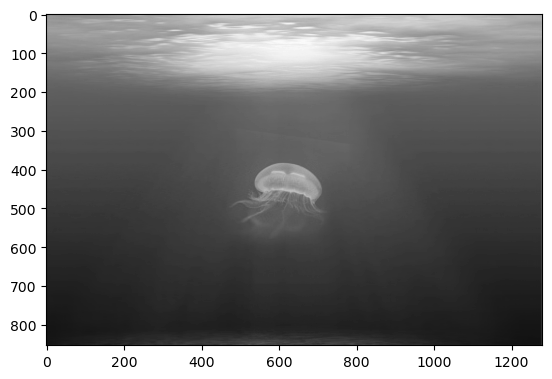

Image3 - New York city: More complex, see log values decrease slower. However still just 20 percent we get a decent image 
Values stored rate: 16.54 %


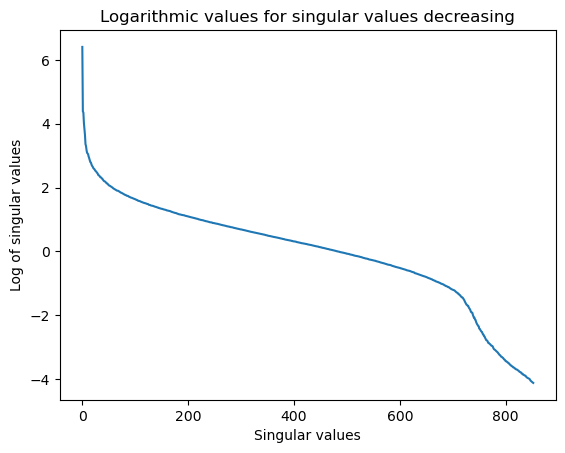

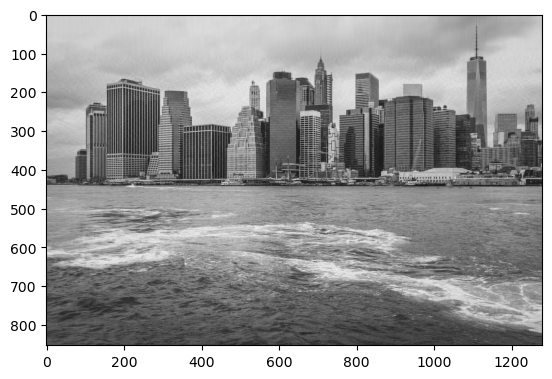

In [11]:

#Images to float: im1, im2, im3

print("Image1 - chessboard: See that need just 30 singular values is sufficient. About 2.5 percent of singular values. Very simple image to represent")
im1_, _ = compress_image_SVD(im1, 0.025, printInfo=True, printLogSing=True)
plt.imshow(im1_, cmap='gray')
plt.show()

print("Image2 - jellyfish: 10 percent seemed sufficient")
im2_, _ = compress_image_SVD(im2, 0.1, printInfo=True, printLogSing=True)
plt.imshow(im2_, cmap='gray')
plt.show()


print("Image3 - New York city: More complex, see log values decrease slower. However still just 20 percent we get a decent image ")
im3_, _ = compress_image_SVD(im3, 0.2, printInfo=True, printLogSing=True)
plt.imshow(im3_, cmap='gray')
plt.show()


Compression rate as a function of n (rows), m (columns) and r (number of singular values). Size of original image n x m decomposed with SVD compressed is U(n x r), S(r x r) and V_T(r x m). Meaning total size of the three arrays is (n * r) + (r * r) + (r * m) = r * (n + r + m).

Meaning if we for example have 100 x 100 (10 000 values) image and choose r = 20. The orignal size is 100*100, while compressed image has size equal ( 20 * (100 + 100 + 20)) = 4400. Meaning we have reduced size to 44% of original image.

In [ ]:

#Plot compression as a function of rate to keep r for example image 3.
# Not a task, but wanted to see relation
vals = np.linspace(0,1, 20)
compression = []
for percent in vals:
    _, rate = compress_image_SVD(im3, percent, printInfo=False, printLogSing=False)
    compression.append(rate)


plt.plot(vals, compression)
plt.xlabel("Percent of sing values used")
plt.ylabel("Percent values stored")
plt.title("Singular values used vs total compression")
plt.show()

